# KNN 알고리즘
최근접 이웃의 갯수에 따라 결과가 달라진다.  
만약 주변의 값(3개) 중에 Black과는 1개가 가깝고 white와는 2개가 가까우면 white로 분류한다.  

# 붓꽃의 품종 분류하기
scikit-learn Library에 있는 연습용 데모 데이터로 붓꽃의 품종을 꽃잎과 꽃받침의 크기에 따라서   
분류해 놓은 데이터 셋을 활용한다.

# 가설 세우기
들판에서 붓꽃을 하나 발견했다고 가정 합시다.   
붓꽃에 대해 잘 알지 못하기 때문에, 전문 식물학자가 측정한 데이터셋을 활용합니다.   
전문 식물학자가 측정해서 결과까지 내어 놓은 데이터와 데이터에 따른 
결과가 있을 것 입니다.   
붓꽃의 품종은 보통 setosa, versicolor, virginica 이렇게 3분류로 되어 있습니다.   
예를들어 꽃받침의 길이가 x cm이고, 꽃잎의 길이가 y cm라면 virginica라고 정의.

# 문제 해결하기
붓꽃의 품종 자체는 잘 알지 못하지만, 전문 식물학자가 작성해 놓은 데이터 셋처럼,   
꽃 받침, 꽃잎의 크기는 구할 수 있습니다.   
즉 채집한 붓꽃의 꽃받침, 꽃잎의 크기를 사용해서 어떤 품종인지 예측해야 합니다.   

# 학습과 분류의 종류
우리가 사용하게될 데이터셋에는 품종을 정확하게 분류한 데이터를 가지고 있습니다.
따라서 지도학습을 실행 할 것 입니다.
몇가지 선택사항(품종)중 하나를 선택 해야 하는 문제 입니다.
따라서 지금 예제는 분류(classification)에 해당 합니다.   
여기서 출력 될 수 있는 값들(setosa, versicolor, virginica)을 클래스(class) 라고 합니다.   
즉 측정한 데이터(feature)를 이용해서 3개의 클래스를 분류한다고 볼 수 있습니다.   
붓꽃 하나에 대한 기대 출력은 그 꽃의 품종이 됩니다.    
이런 특정 데이터 포인트애 대해 기대할 수 있는 출력을 레이블(label)이라고 합니다.

# 데이터 적재하기
scikit_learn의 datatest 모듈에 잇는 iris data불러오기

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()





In [4]:
# iris dataset의 key 확인하기
iris_dataset.keys()





dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(iris_dataset['data'][0:10])





[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [8]:
print(iris_dataset['target'])





[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
print(iris_dataset['target_names'])





['setosa' 'versicolor' 'virginica']


In [10]:
print(iris_dataset['DESCR'])





.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
print(iris_dataset['feature_names'])





['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [14]:
# Data의 크기
print(iris_dataset['data'].shape)





(150, 4)


--------------------------------------------------------

# 훈련용 데이터와 테스트 데이터 나누기
scikit-learn에서 데이터는 x로 표기하고 레이블은 y로 표기합니다.
수학의 f(x) = y 에서 유래

# 중요! 측정을 잘 할수 잇는 성능 테스트 하기  
모델을 측정하기 위해 가장 간단한 방법은 위의 데이터셋을 2그룹으로 나누는 것.   
- 첫번째 데이터셋은 머신러닝 모델을 만들 때 사용. 이를 훈련용 데이터 혹은 훈련용 세트 라고함.   
- 두번째 데이터셋은 첫번째  세트로 만들어낸 머신러닝 모델의 테스트 용도로 사용.   
이를 테스트 데이터 혹은 테스트 세트 혹은 홀드아웃 세트 라고 합니다.   

train_test_split 이라는 모듈을 활용하여 데이터를 나눌때는 랜덤하게 나눠져야 합니다.   
iris_dataset['target']을 확인해 보면 맨 뒤에 잇는 데이터는 전부 레이블이 2로 동일합니다.   
3클라스 중 하나만 포함한 테스트 세트를 사용하면 일반화가 이루어지지 않습니다.   
따라서 테스트세트를 적절하게 잘 섞어줄 수 있는 난수(random)을 활용합니다.   

기본적으로 train_test_split 함수는 랜덤하게 shuffling을 해주지만   
실행할 때마다 실행결과가 달라질 수 있기 때문에 Seed 개념을 이용해 랜덤 값을 고정

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(iris_dataset['data'],iris_dataset['target'], random_state = 0) #random_state = 0 난수를 한번 실행 후 고정





In [25]:
# Train 확인
print(X_train.shape) # 문제
print(X_test.shape) # 정답





(112, 4)
(38, 4)


In [26]:
# Test 확인
print(y_train.shape) # 문제
print(y_test.shape) # 정답





(112,)
(38,)


In [21]:
X_train





array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.6, 0.6],
       [5.4, 3.7, 1.5, 0.2],
       [5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3

--------------
# 데이터 시각화로 살펴보기
실제 훈련과 테스트를 해보기 이전에 신뢰할 수 있는 데이터인지 시각화를 통해 확인.   
산점도(scatter plot)를 활용한 방법이 좋습니다.   
현재 데이터는 총 4가지이기 때문에 하나의 그래프에서 확인하기 힘듭니다.   
따라서 산점도 행렬(scatter matrix)를 이용   
scatter matrix를 사용하려면 Dataframe 형태로 변경 해야 합니다.   

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
# pip install mglearn
import mglearn
%matplotlib inline

iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)









In [30]:
iris_dataframe.head()





,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


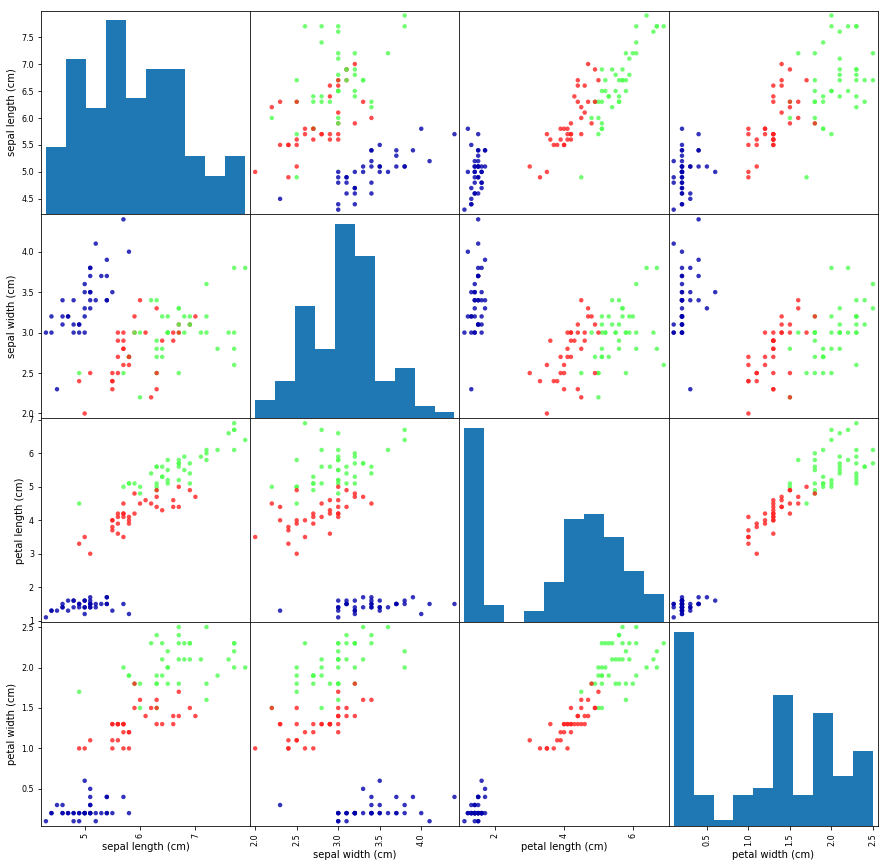

In [32]:
# 칼럼, 피규어사이즈, 마커
pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize=(15,15), marker='o', s=20, alpha=0.8, cmap=mglearn.cm3)
plt.show()
#파랑색이 세토사 빨강색이 버지칼라 녹색이 버지니카 (버지니카 버지칼라가 조금 확실히 분류되지 않아서 답이 왔다갔다)





# k - 최근접 이웃 알고리즘
KNN 알고리즘은 새로운 데이터에 대한 예측이 필요할 때 새로운 데이터와 가장 가까운   
K 개의 훈련된 데이터 포인트들을 찾는 것.

In [60]:
from sklearn.neighbors import KNeighborsClassifier #KNN분류기
knn = KNeighborsClassifier(n_neighbors = 3) # k의 값을 1로 정함.(근처에 1개만 걸려도 따라감)





# fit
fit 메소드를 활용하여 모델을 생성합니다.    
이때 훈련해야 할 데이터는 위에서 만들어 놓은 X_train 과 y_train 입니다.      
새로운 데이터를 가지고 새로운 모델을 만들어 냄.

In [61]:
# 훈련시키기
knn.fit(X_train, y_train)





KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [77]:
# 데이터 예측하기
pre=knn.predict([[5.1, 3.0, 1.3, 0.2]])
print('예측 : {}'.format(pre))
print('예측이름 : {}'.format(iris_dataset['target_names'][pre]))





예측 : [0]
예측이름 : ['setosa']


In [63]:
# 모델 평가
y_pre = knn.predict(X_test) # 테스트 데이터셋을 넣어서 예측하기
print('테스트 예측 : {}'.format(y_pre))





테스트 예측 : [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [3]:
import numpy as np





In [64]:
# 정답이 들어있는 y_test와 knn 모델이 예측한 y_pre의 일치도를 살펴보기 
print('테스트 셋의 정확도 : {:.2f}'.format(np.mean(y_pre == y_test )))





테스트 셋의 정확도 : 0.97


In [65]:
from sklearn import svm, metrics

# 정답률 구하기
ac_score = metrics.accuracy_score(y_test, y_pre)
print('정답률 : ',ac_score) # 정답률 1.0 100퍼센트 모두 맞추었다.





정답률 :  0.9736842105263158


### 꼭 K의 값이 큰게 좋은게 아니다. 그래프를 보았을 때 어느정도 범위를 주어서 분류하는게 좋은지 판단 해야한다.
### 항상 산점도를 보면서 데이터 분류를 생각 해야한다.

# 한셀에 정리 해 보기 

In [10]:
X_train
y_train





array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

In [5]:
# 데이터 선정 - 붓꽃의 모든 데이터를 불러온다.
iris_dataset = load_iris()

# 훈련용 데이터 테스트 데이터 분류
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(iris_dataset['data'],iris_dataset['target'], random_state = 0)

# 데이터 프레임 형성??
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)

# KNN 알고리즘 선언
from sklearn.neighbors import KNeighborsClassifier #KNN분류기
knn = KNeighborsClassifier(n_neighbors = 3) # k의 값을 1로 정함.(근처에 1개만 걸려도 따라감)

# 훈련시키기
knn.fit(X_train, y_train)

# 데이터 예측하기
pre=knn.predict([[5.8, 2.8, 5.1, 2.4]])
print('예측 : {}'.format(pre))
print('예측이름 : {}'.format(iris_dataset['target_names'][pre]))

# 모델 평가
y_pre = knn.predict(X_test) # 테스트 데이터셋을 넣어서 예측하기
print('테스트 예측 : {}'.format(y_pre))

# 정답이 들어있는 y_test와 knn 모델이 예측한 y_pre의 일치도를 살펴보기 - matrix가 이걸 해주는것?
print('테스트 셋의 정확도 : {:.2f}'.format(np.mean(y_pre == y_test )))

















예측 : [2]
예측이름 : ['virginica']
테스트 예측 : [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
테스트 셋의 정확도 : 0.97


In [76]:
# SVM 사용하여 알아보기
import pandas as pd
from sklearn import svm, metrics

# 데이터 학습과 예측하기
clf = svm.SVC()  # svm의 객체 생성 - clf에 모든 기능이 상속됨
clf.fit(X_train, y_train) # 학습을하는데 데이터는 xor_data이고 답은 xor_label이다 라는 명령 - clf가 학습을 함

pre=clf.predict(X_train)

# 정답률 구하기
ac_score = metrics.accuracy_score(y_train, pre)
print('정답률 : ',ac_score) # 정답률 1.0 100퍼센트 모두 맞추었다.


# 단계를 정리해 보면 - 데이터를 불러오기 - 데이터를 학습과 답으로 분류 - 머신러닝 학습시키고 예측하기 정답률 구하기
# 모든 머신러닝이 이러한 단계를 거친다.

















정답률 :  0.9821428571428571


C:\Users\GSCHOI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
